In [5]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

%matplotlib inline

In [12]:
#splitting the csv so it can be split into two files, one for training

In [36]:
df = pd.read_csv('/Users/christinemagnotta/RDShipWars/cheronica.csv')

In [44]:
df

,tweets,quote_status,language,favorite_count,retweet_count,time,id,split
0,cheronica is hot why lie https://t.co/kAR7kTcd1D,True,en,1,0,2021-02-27 17:34:02,1365716836675850242,0.095448
1,@tiedu2me OMGGG CHERONICA !!,False,en,0,0,2021-02-27 17:32:26,1365716435725615104,-0.633913
2,RT @choniswitches2: I’ll leave the fandom. my ...,True,en,0,1,2021-02-27 17:24:39,1365714477707051013,-0.868540
3,I’ll leave the fandom. my nerves i can take bu...,True,en,16,1,2021-02-27 17:22:24,1365713910637207553,-0.316588
4,waiting for my cheronica scenes https://t.co/B...,False,en,0,0,2021-02-27 09:06:59,1365589233386229762,0.035928
...,...,...,...,...,...,...,...,...
58,@jessdamnday hahaha ur good\n- top fav charact...,False,en,2,0,2021-02-21 16:11:30,1363521742057189380,-0.527180
59,@klainescandIes — top fav characters:\n1.veron...,False,en,1,0,2021-02-21 15:32:58,1363512042674659334,-1.079525
60,"@lamercenairex i watched bf, i will watch give...",False,en,1,0,2021-02-20 10:44:23,1363077029441249282,0.628230
61,no bc at this point i will take just about any...,False,en,1,0,2021-02-20 00:03:48,1362915820494536711,-1.115915


In [40]:
df['split'] = np.random.randn(df.shape[0], 1)

In [41]:
msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

In [46]:
train.count()

tweets            45
quote_status      45
language          45
favorite_count    45
retweet_count     45
time              45
id                45
split             45
dtype: int64

In [47]:
test.count()

tweets            18
quote_status      18
language          18
favorite_count    18
retweet_count     18
time              18
id                18
split             18
dtype: int64

In [48]:
train.head()

,tweets,quote_status,language,favorite_count,retweet_count,time,id,split
0,cheronica is hot why lie https://t.co/kAR7kTcd1D,True,en,1,0,2021-02-27 17:34:02,1365716836675850242,0.095448
1,@tiedu2me OMGGG CHERONICA !!,False,en,0,0,2021-02-27 17:32:26,1365716435725615104,-0.633913
3,I’ll leave the fandom. my nerves i can take bu...,True,en,16,1,2021-02-27 17:22:24,1365713910637207553,-0.316588
5,@beronicq @oliviabakcr then why does it make s...,False,en,0,0,2021-02-27 03:18:03,1365501423820156929,-1.142987
7,"RT @Everybody_Sings: dear writers,\n\nfirst on...",False,en,0,1,2021-02-27 00:17:44,1365456045443809285,0.641597


In [49]:
test.head()

,tweets,quote_status,language,favorite_count,retweet_count,time,id,split
2,RT @choniswitches2: I’ll leave the fandom. my ...,True,en,0,1,2021-02-27 17:24:39,1365714477707051013,-0.868540
4,waiting for my cheronica scenes https://t.co/B...,False,en,0,0,2021-02-27 09:06:59,1365589233386229762,0.035928
6,@beronicq @oliviabakcr you hate cheronica so y...,False,en,0,0,2021-02-27 03:15:43,1365500833652215817,0.061130
9,i’ll get stabbed for this but cheronica pls ri...,True,en,0,0,2021-02-26 17:49:38,1365358373831663617,-0.951605
14,I'm making a cheronica prom scene and I'm lovi...,False,en,18,0,2021-02-25 10:54:34,1364891530645942274,0.415160


In [54]:
from textblob import TextBlob

In [55]:
#trying to figure out the sentiment analysis

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

In [57]:
blob = TextBlob(text)
blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)
# 0.060
# -0.341

0.06000000000000001
-0.34166666666666673


In [59]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment



Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [60]:
testimonial2 = TextBlob("Harry isn’t coming to the party. Tell Joe that we’ll see him next week.")
testimonial2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [62]:
testimonial3 = TextBlob("You should bring wine or beer and dessert.")

In [63]:
testimonial3.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [64]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christinemagnotta/nltk_data...


In [65]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [67]:
b = "Harry isn’t coming to the party. Tell Joe that we’ll see him next week."
sid.polarity_scores(b)

{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}

In [70]:
df = pd.read_csv('RDShipWars/falice.csv')

In [73]:
df

,tweets,quote_status,language,favorite_count,retweet_count,time,id
0,RT @softfalice: melissa and joey moments that ...,False,en,0,5,2021-02-27 05:47:04,1365538924492320773
1,@mishacollins\n lets sue the Riverdale writers...,False,en,0,0,2021-02-27 05:31:58,1365535122942910464
2,@mishacollins lets sue the Riverdale writers a...,False,en,0,0,2021-02-27 05:31:41,1365535050641547265
3,"The pinky TEASE, I miss season 2 falice https:...",True,en,4,0,2021-02-27 04:10:05,1365514517325742082
4,RT @amicksbabe: I want fp’s letter @RiverdaleW...,False,en,0,5,2021-02-27 03:58:02,1365511482591567874
...,...,...,...,...,...,...,...
221,@dioramick how’s falice doing?,False,en,24,0,2021-02-19 18:39:26,1362834192984383490
222,RT @barchie_stan: rt if you wanna be mutuals👉🏻...,False,en,0,6,2021-02-19 18:10:13,1362826841141121025
223,@barchiesdreams Honestly id replace veggie wit...,False,en,0,0,2021-02-19 15:57:27,1362793426861887493
224,@PRiveerdale Bughead and choni\n\nAnd young fa...,False,en,2,0,2021-02-19 15:57:06,1362793340668887043


In [75]:
sid = SentimentIntensityAnalyzer()

In [76]:
sid.polarity_scores(df)

AttributeError: 'DataFrame' object has no attribute 'encode'

In [84]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = df['tweets'].apply(analyzer.polarity_scores)
pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

,tweets,quote_status,language,favorite_count,retweet_count,time,id,compound,neg,neu,pos,neg,neu,pos,compound
0,RT @softfalice: melissa and joey moments that ...,False,en,0,5,2021-02-27 05:47:04,1365538924492320773,0.2732,0.000,0.840,0.160,0.000,0.840,0.160,0.2732
1,@mishacollins\n lets sue the Riverdale writers...,False,en,0,0,2021-02-27 05:31:58,1365535122942910464,0.0000,0.000,1.000,0.000,0.000,1.000,0.000,0.0000
2,@mishacollins lets sue the Riverdale writers a...,False,en,0,0,2021-02-27 05:31:41,1365535050641547265,0.0000,0.000,1.000,0.000,0.000,1.000,0.000,0.0000
3,"The pinky TEASE, I miss season 2 falice https:...",True,en,4,0,2021-02-27 04:10:05,1365514517325742082,-0.5622,0.481,0.519,0.000,0.481,0.519,0.000,-0.5622
4,RT @amicksbabe: I want fp’s letter @RiverdaleW...,False,en,0,5,2021-02-27 03:58:02,1365511482591567874,0.0772,0.000,0.794,0.206,0.000,0.794,0.206,0.0772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,@dioramick how’s falice doing?,False,en,24,0,2021-02-19 18:39:26,1362834192984383490,0.0000,0.000,1.000,0.000,0.000,1.000,0.000,0.0000
222,RT @barchie_stan: rt if you wanna be mutuals👉🏻...,False,en,0,6,2021-02-19 18:10:13,1362826841141121025,0.0000,0.000,1.000,0.000,0.000,1.000,0.000,0.0000
223,@barchiesdreams Honestly id replace veggie wit...,False,en,0,0,2021-02-19 15:57:27,1362793426861887493,0.4588,0.000,0.667,0.333,0.000,0.667,0.333,0.4588
224,@PRiveerdale Bughead and choni\n\nAnd young fa...,False,en,2,0,2021-02-19 15:57:06,1362793340668887043,0.0000,0.000,1.000,0.000,0.000,1.000,0.000,0.0000


In [85]:
analyzer

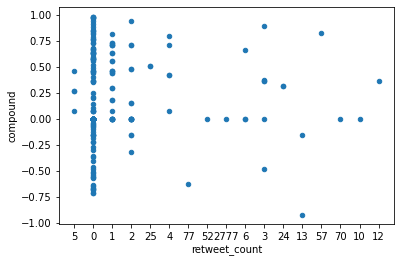

In [91]:
ax2 = df.plot.scatter(x='retweet_count',
                      y='compound')

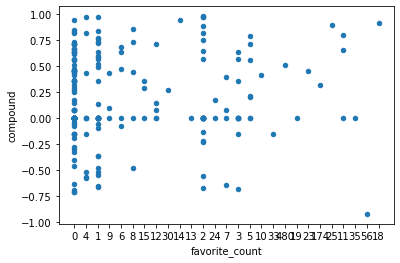

In [89]:
ax3 = df.plot.scatter(x='favorite_count',
                      y='compound')

In [95]:
df['retweet_count'] = df['retweet_count'].astype(int)

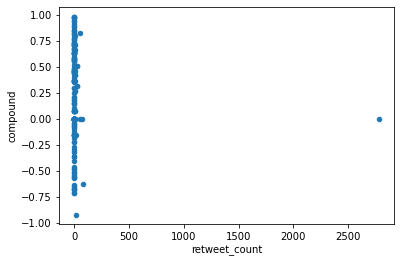

In [96]:
ax2 = df.plot.scatter(x='retweet_count',
                      y='compound')

In [99]:
df['favorite_count'] = df['favorite_count'].astype(int)

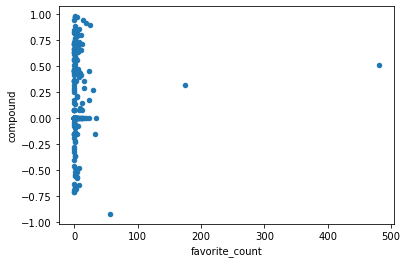

In [100]:
ax3 = df.plot.scatter(x='favorite_count',
                      y='compound')

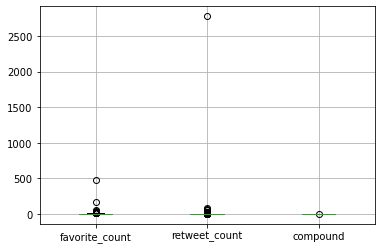

In [101]:
boxplot = df.boxplot(column=['favorite_count', 'retweet_count', 'compound'])

In [102]:
df.sort_values(by='retweet_count', ascending=False)

,tweets,quote_status,language,favorite_count,retweet_count,time,id,compound,neg,neu,pos,rating
52,RT @peoplewsmiles: Niall Horan https://t.co/RN...,False,en,0,2777,2021-02-25 11:15:48,1364896875573346305,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
35,RT @ilovefpalice: the falice scene i have so M...,False,en,0,77,2021-02-25 20:56:46,1365043082136330241,-0.6273,0.299,0.701,0.000,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp..."
147,RT @DrewRayTanner: Mmmmm did someone say #fali...,False,en,0,70,2021-02-22 05:38:12,1363724754524413952,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
91,RT @barchie_gifs: Riverdales best &amp; most i...,False,en,0,57,2021-02-24 20:41:05,1364676746004623367,0.8307,0.000,0.673,0.327,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
47,RT @BugheadGif: cole and lili as young falice ...,False,en,0,52,2021-02-25 17:48:37,1364995731841449986,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...,...
99,"@buvghead now that you say so, bettys probably...",False,en,0,0,2021-02-24 12:21:56,1364551130743771139,-0.2960,0.115,0.885,0.000,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp..."
102,IF ITS LILI AND COLE PLAYING ALICE AND FP IS T...,True,en,1,0,2021-02-24 09:01:40,1364500731382923264,-0.0943,0.082,0.847,0.071,"{'neg': 0.082, 'neu': 0.847, 'pos': 0.071, 'co..."
105,/ um we’re gonna ignore my falice sticker &amp...,False,en,1,0,2021-02-24 03:19:55,1364414729859563521,-0.3612,0.200,0.800,0.000,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound..."
106,Happy I finished 4 chapters of my falice fic,False,en,3,0,2021-02-24 02:40:47,1364404879410700288,0.5719,0.000,0.619,0.381,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp..."


In [106]:
df_new = df.drop(df.index[52])



In [107]:
df_new

,tweets,quote_status,language,favorite_count,retweet_count,time,id,compound,neg,neu,pos,rating
0,RT @softfalice: melissa and joey moments that ...,False,en,0,5,2021-02-27 05:47:04,1365538924492320773,0.2732,0.000,0.840,0.160,"{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou..."
1,@mishacollins\n lets sue the Riverdale writers...,False,en,0,0,2021-02-27 05:31:58,1365535122942910464,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@mishacollins lets sue the Riverdale writers a...,False,en,0,0,2021-02-27 05:31:41,1365535050641547265,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"The pinky TEASE, I miss season 2 falice https:...",True,en,4,0,2021-02-27 04:10:05,1365514517325742082,-0.5622,0.481,0.519,0.000,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp..."
4,RT @amicksbabe: I want fp’s letter @RiverdaleW...,False,en,0,5,2021-02-27 03:58:02,1365511482591567874,0.0772,0.000,0.794,0.206,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...,...
221,@dioramick how’s falice doing?,False,en,24,0,2021-02-19 18:39:26,1362834192984383490,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
222,RT @barchie_stan: rt if you wanna be mutuals👉🏻...,False,en,0,6,2021-02-19 18:10:13,1362826841141121025,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
223,@barchiesdreams Honestly id replace veggie wit...,False,en,0,0,2021-02-19 15:57:27,1362793426861887493,0.4588,0.000,0.667,0.333,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."
224,@PRiveerdale Bughead and choni\n\nAnd young fa...,False,en,2,0,2021-02-19 15:57:06,1362793340668887043,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [108]:
df_new.sort_values(by='retweet_count', ascending=False)

,tweets,quote_status,language,favorite_count,retweet_count,time,id,compound,neg,neu,pos,rating
35,RT @ilovefpalice: the falice scene i have so M...,False,en,0,77,2021-02-25 20:56:46,1365043082136330241,-0.6273,0.299,0.701,0.000,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp..."
147,RT @DrewRayTanner: Mmmmm did someone say #fali...,False,en,0,70,2021-02-22 05:38:12,1363724754524413952,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
91,RT @barchie_gifs: Riverdales best &amp; most i...,False,en,0,57,2021-02-24 20:41:05,1364676746004623367,0.8307,0.000,0.673,0.327,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
47,RT @BugheadGif: cole and lili as young falice ...,False,en,0,52,2021-02-25 17:48:37,1364995731841449986,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
90,We have something to tell you: we miss #Falice...,False,en,480,25,2021-02-24 21:04:26,1364682624363552769,0.5106,0.086,0.703,0.211,"{'neg': 0.086, 'neu': 0.703, 'pos': 0.211, 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...
99,"@buvghead now that you say so, bettys probably...",False,en,0,0,2021-02-24 12:21:56,1364551130743771139,-0.2960,0.115,0.885,0.000,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp..."
102,IF ITS LILI AND COLE PLAYING ALICE AND FP IS T...,True,en,1,0,2021-02-24 09:01:40,1364500731382923264,-0.0943,0.082,0.847,0.071,"{'neg': 0.082, 'neu': 0.847, 'pos': 0.071, 'co..."
105,/ um we’re gonna ignore my falice sticker &amp...,False,en,1,0,2021-02-24 03:19:55,1364414729859563521,-0.3612,0.200,0.800,0.000,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound..."
106,Happy I finished 4 chapters of my falice fic,False,en,3,0,2021-02-24 02:40:47,1364404879410700288,0.5719,0.000,0.619,0.381,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp..."


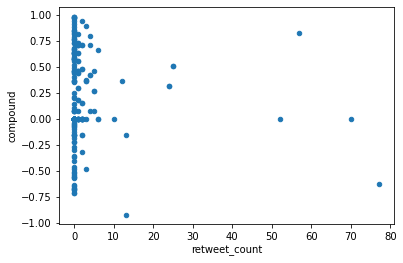

In [109]:
ax4 = df_new.plot.scatter(x='retweet_count',
                      y='compound')